<a href="https://colab.research.google.com/github/jordan-dsouza/SlashMarkInternship/blob/main/housesales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline
sns.set()

**Data preprocessing:**

In [2]:
data = pd.read_csv("kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.shape

(21613, 21)

In [6]:
#Removing null values if any:
data = data.dropna()

**EDA:**

Text(0, 0.5, 'Count')

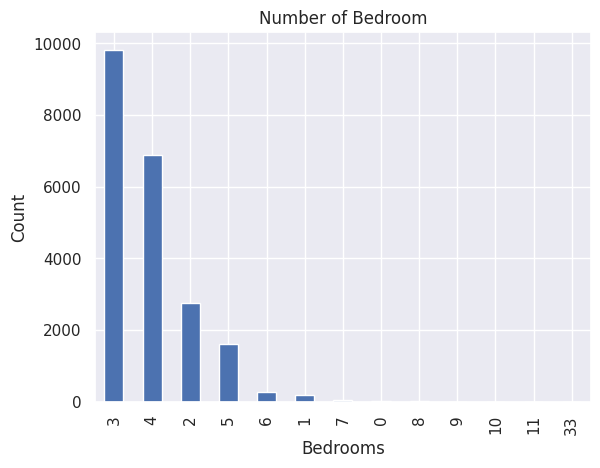

In [7]:
data["bedrooms"].value_counts().plot(kind="bar")
plt.title("Number of Bedroom")
plt.xlabel("Bedrooms")
plt.ylabel("Count")

In [8]:
'''plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
plt1 = plt()
sns.despine'''

"plt.figure(figsize=(10,10))\nsns.jointplot(x=data.lat.values, y=data.long.values, size=10)\nplt.ylabel('Longitude', fontsize=12)\nplt.xlabel('Latitude', fontsize=12)\nplt.show()\nplt1 = plt()\nsns.despine"

Text(0.5, 1.0, 'Price vs Square Feet')

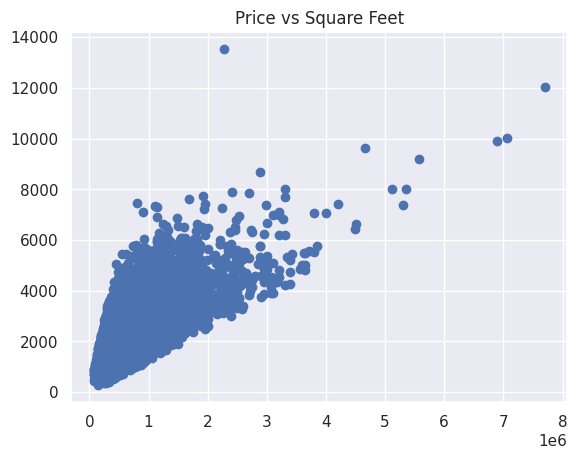

In [9]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Location of the area')

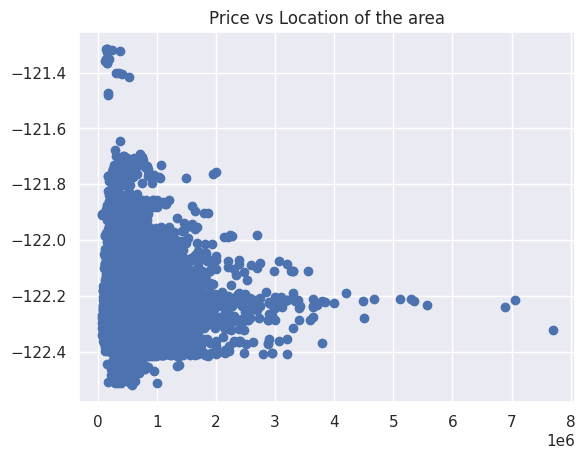

In [10]:
plt.scatter(data.price,data.long)
plt.title("Price vs Location of the area")

Text(0.5, 1.0, 'Latitude vs Price')

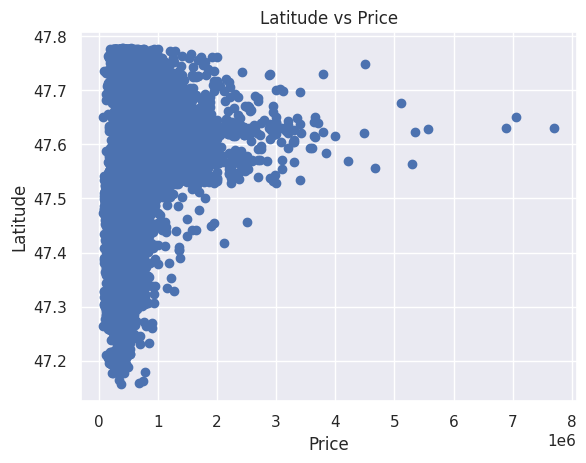

In [11]:
plt.scatter(data.price,data.lat)
plt.xlabel("Price")
plt.ylabel("Latitude")
plt.title("Latitude vs Price")

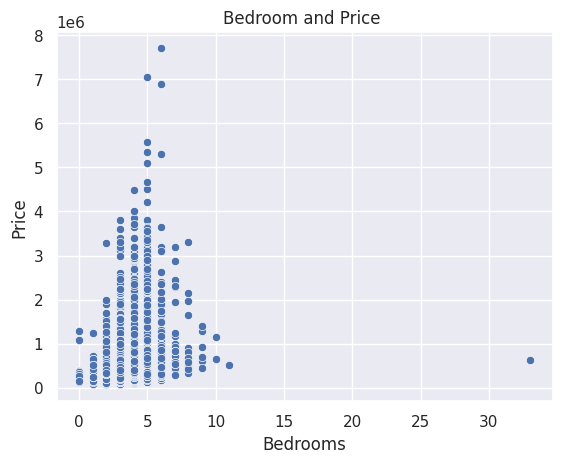

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [29]:
sns.scatterplot(x = data.bedrooms, y = data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

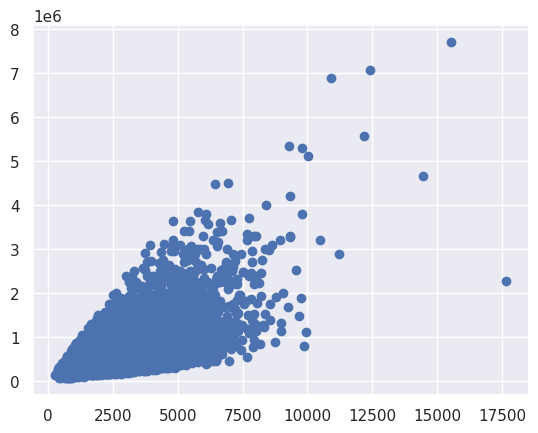

In [13]:
plt.scatter((data["sqft_living"]+data["sqft_basement"]),data["price"])

Text(0.5, 1.0, 'Waterfront vs Price ( 0= no waterfront)')

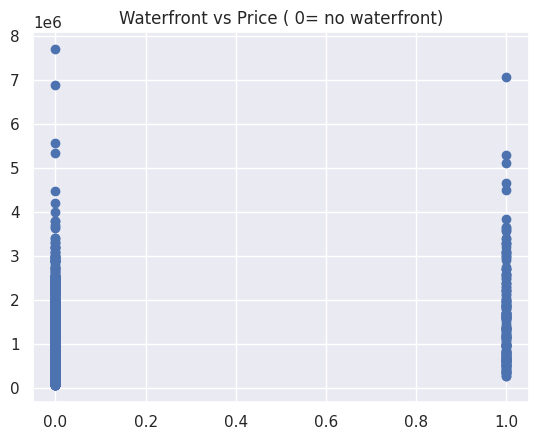

In [14]:
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

Text(0.5, 1.0, 'Floors')

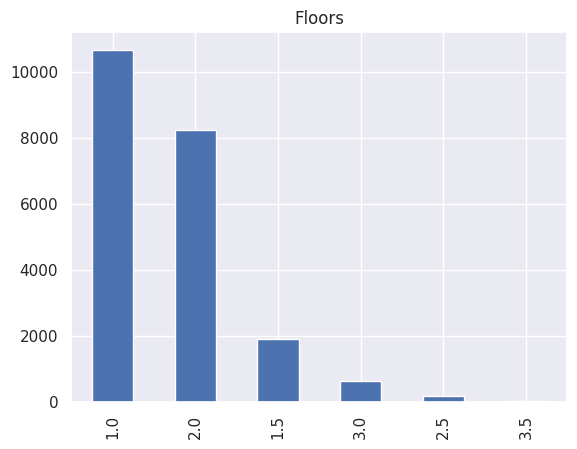

In [17]:
data.floors.value_counts().plot(kind='bar')
plt.title("Floors")

Text(0.5, 1.0, 'Condition vs price as per number of floors:')

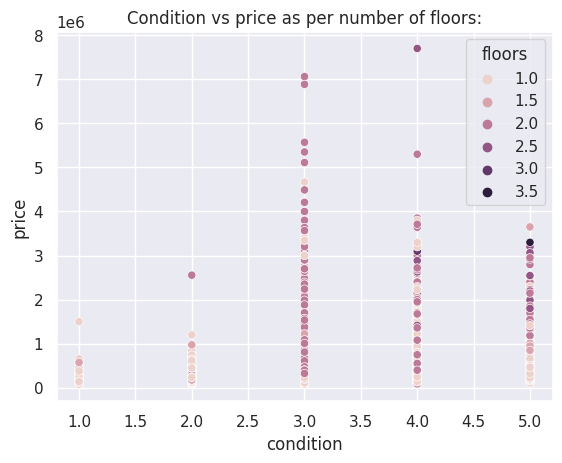

In [32]:
sns.scatterplot(hue = data.floors, y = data.price, x = data.condition)
plt.title("Condition vs price as per number of floors:")


Text(0.5, 1.0, 'Which is the pricey location by zipcode?')

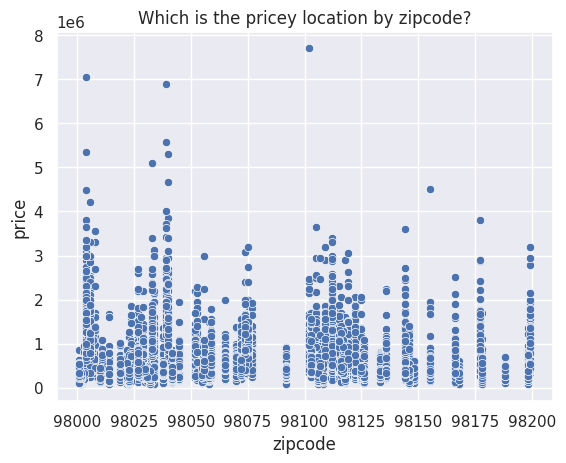

In [36]:
sns.scatterplot(x = data.zipcode, y = data.price)
plt.title("Which is the pricey location by zipcode?")

**Linear regression:**

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
reg = LinearRegression()

In [40]:
labels = data["price"]
#1 for 2014, else 0:
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data["date"] = conv_dates
train1 = data.drop(["id", "price"],axis=1)

In [41]:
train1.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
#10% data used for testing:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

In [44]:
reg.fit(x_train,y_train)

LinearRegression()

In [45]:
reg.score(x_test,y_test)

0.7320342760357581

The GradientBoostingRegressor is part of the gradient boosting family of algorithms, which builds an ensemble of weak learners (typically decision trees) sequentially, with each tree correcting the errors of the previous ones. The combination of multiple weak models results in a strong predictive model.

In [48]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = "squared_error")

In [49]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [50]:
clf.score(x_test,y_test)

0.9195334413237739

In [52]:
params = {"n_estimators": 400}
t_sc = np.zeros((params['n_estimators']),dtype=np.float64)

In [53]:
y_pred = reg.predict(x_test)

In [54]:
for i,y_pred in enumerate(clf.staged_predict(x_test)):
    t_sc[i]=clf.loss_(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


In [55]:
testsc = np.arange((params["n_estimators"]))+1

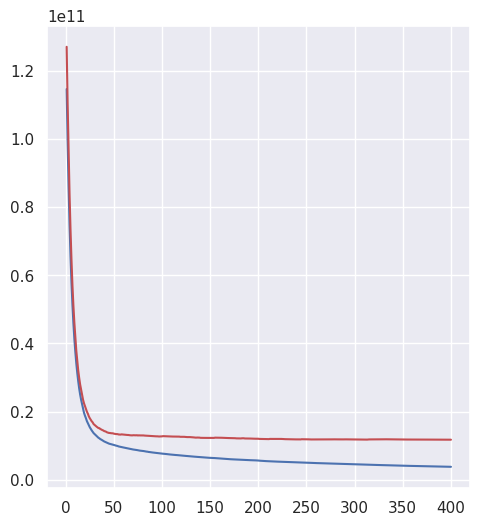

In [59]:
#Plotting training and testing scores:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc,clf.train_score_,"b-",label= "Set dev train")
plt.plot(testsc,t_sc,"r-",label = "set dev test")

In [57]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [58]:
pca = PCA()

In [ ]:
pca.fit_transform(scale(train1))

array([[ -2.64785461e+00,  -4.54699955e-02,  -3.16665762e-01, ...,
         -7.94687728e-02,   1.50034920e-16,   0.00000000e+00],
       [ -2.34485164e-01,   1.68297114e+00,  -7.61521725e-01, ...,
          9.81487761e-01,   1.16450053e-14,  -0.00000000e+00],
       [ -2.57007792e+00,  -6.14344122e-01,   3.49292423e-01, ...,
         -1.38570764e-01,  -1.75544022e-16,   0.00000000e+00],
       ..., 
       [ -2.41985641e+00,  -1.10027662e+00,  -1.46293798e+00, ...,
          9.66785881e-01,  -9.02134747e-17,  -0.00000000e+00],
       [  3.32183025e-01,  -1.88043103e+00,  -1.04412760e+00, ...,
         -3.97449542e-01,   9.59177792e-17,   0.00000000e+00],
       [ -2.43180432e+00,  -1.08505981e+00,  -1.47248379e+00, ...,
          9.53674385e-01,  -7.64356004e-17,  -0.00000000e+00]])

In [64]:
#Features by contribution:
feature_importance = pd.DataFrame({"Feature": x_train.columns, "Importance": clf.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
print("Features by contribution to prediction: \n")
print(feature_importance)

Features by contribution to prediction: 

          Feature  Importance
9           grade    0.304300
3     sqft_living    0.279386
15            lat    0.164106
16           long    0.071703
6      waterfront    0.035474
17  sqft_living15    0.032631
12       yr_built    0.028048
10     sqft_above    0.016380
7            view    0.015247
14        zipcode    0.014907
4        sqft_lot    0.010784
18     sqft_lot15    0.008051
2       bathrooms    0.006264
11  sqft_basement    0.004872
8       condition    0.002858
13   yr_renovated    0.002318
1        bedrooms    0.001350
5          floors    0.001321
0            date    0.000000
